In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import warnings

# Para ignorar mensagens de aviso
warnings.filterwarnings("ignore")

# Cosumo de vinho por País em 2016 + Previsões de consumo por pessoa para 2020 e 2025 

In [77]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Repository\Study\Data_Science_Projects\Studies\Datasets\alcohol-consumption.csv')

In [78]:
df.shape

(189, 10)

In [79]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [81]:
df = df.drop(['beer_percentage' , 'spirits_percentage' , 'other_percentage'] , axis=1)

In [82]:
df.shape

(189, 7)

In [83]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,wine_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,7.4,11.5,11.9
1,Lithuania,15.0,13.8,1.2,7.3,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,21.3,11.2,11.4
3,Seychelles,13.8,12.4,1.4,22.4,10.4,10.6
4,Germany,13.4,11.3,1.4,28.4,12.8,12.6


In [84]:
df = df.sort_values(by=['wine_percentage'], ascending=False)

In [85]:
df.head(20) 

,country,total_consumption,recorded_consumption,unrecorded_consumption,wine_percentage,2020_projection,2025_projection
151,Tuvalu,1.7,1.2,0.5,84.7,1.7,1.7
86,São Tomé and Príncipe,6.8,4.9,2.0,80.2,7.1,7.4
166,Indonesia,0.8,0.3,0.5,76.4,1.1,1.6
78,Italy,7.5,7.1,0.5,64.8,7.0,6.1
14,Luxembourg,12.3,10.6,2.1,61.5,11.8,11.0
13,Portugal,12.3,10.6,2.1,61.5,11.8,11.0
10,France,12.6,11.8,1.5,58.8,12.3,12.1
12,Slovenia,12.6,10.8,1.8,50.6,11.6,10.6
144,Nepal,2.0,0.6,1.4,49.0,2.3,2.6
21,Switzerland,11.5,9.5,1.2,48.1,10.9,10.3


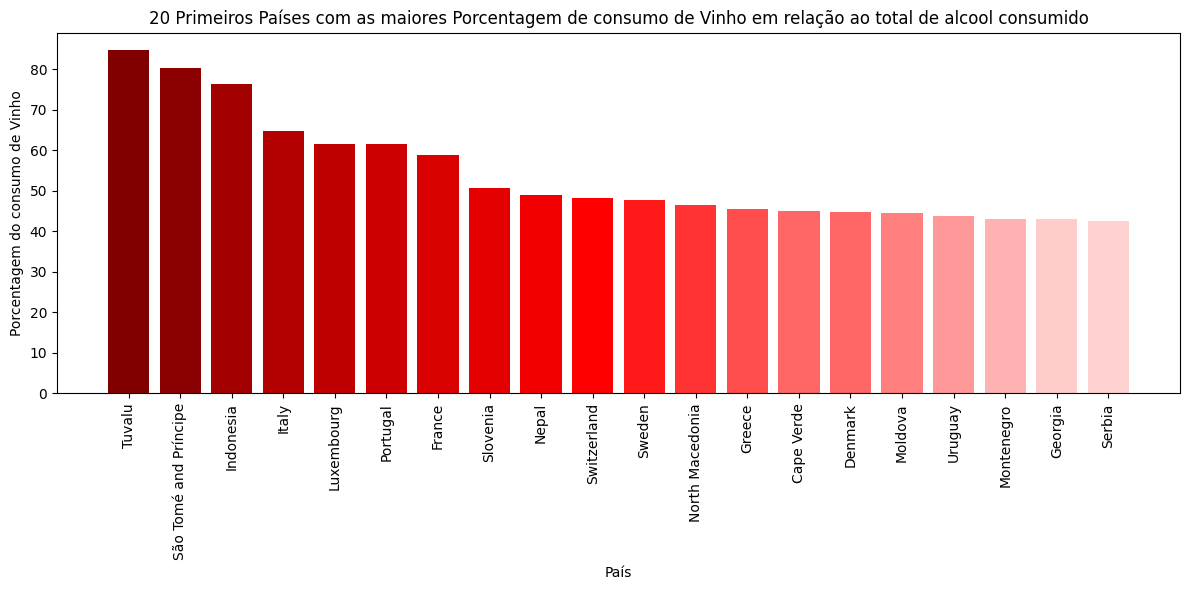

In [100]:
# Selecionar os 20 primeiros países
top_20 = df.head(20)

cores = [
'#800000',
'#8B0000',
'#A30000',
'#B30000',
'#BF0000',
'#CC0000',
'#D90000',
'#E50000',
'#F20000',
'#FF0000',
'#FF1919',
'#FF3333',
'#FF4C4C',
'#FF6666',
'#FF6666',
'#FF7F7F',
'#FF9999',
'#FFB2B2',
'#FFCCCC',
'#FFD1D1'

]

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20['country'], top_20['wine_percentage'] , color=cores)
plt.xlabel('País')
plt.ylabel('Porcentagem do consumo de Vinho')
plt.title('20 Primeiros Países com as maiores Porcentagem de consumo de Vinho em relação ao total de alcool consumido')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [101]:
top_20 = top_20[::-1]


In [102]:
cores = cores[::-1]

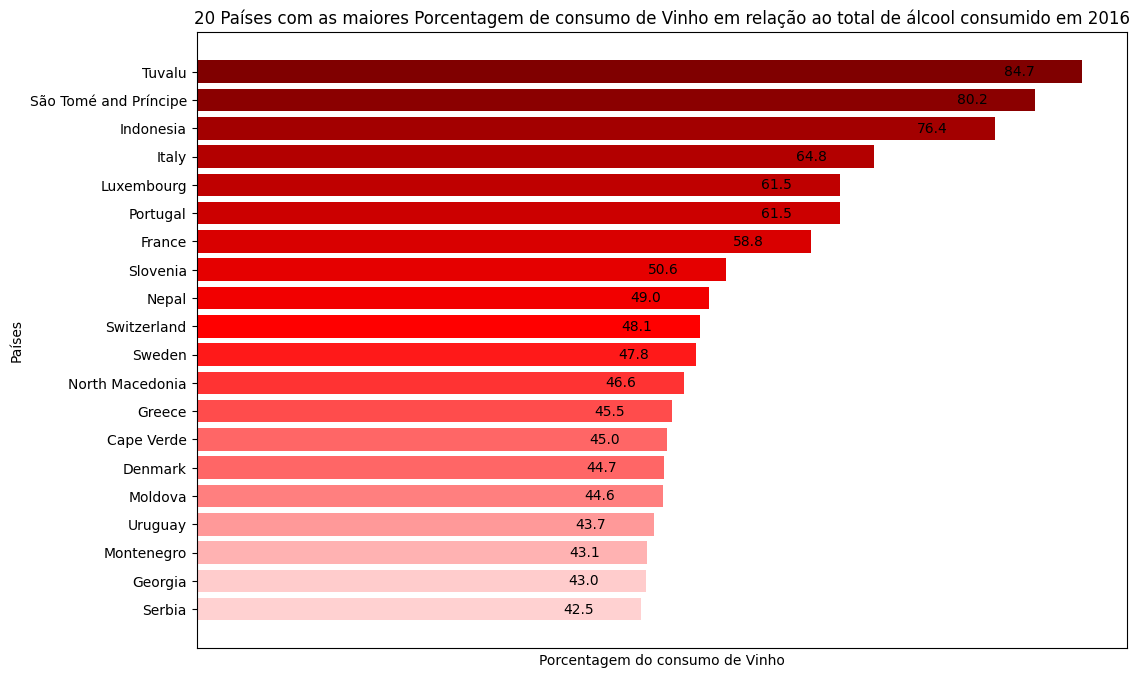

In [105]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(top_20['country'], top_20['wine_percentage'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Porcentagem do consumo de Vinho')
plt.ylabel('Países')
plt.title('20 Países com as maiores Porcentagem de consumo de Vinho em relação ao total de álcool consumido em 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, top_20['wine_percentage'], top_20['country']):
   plt.text(bar[0].get_width() - 6 , bar[0].get_y() + bar[0].get_height()/2, str(media), ha='center', va='center', color='black')


plt.xticks([])
plt.show()

In [112]:
df = df.sort_values(by=['2020_projection'], ascending=False)

In [115]:
top_20_projection_2020 = df.head(20)
top_20_projection_2020 = top_20_projection_2020[::-1]

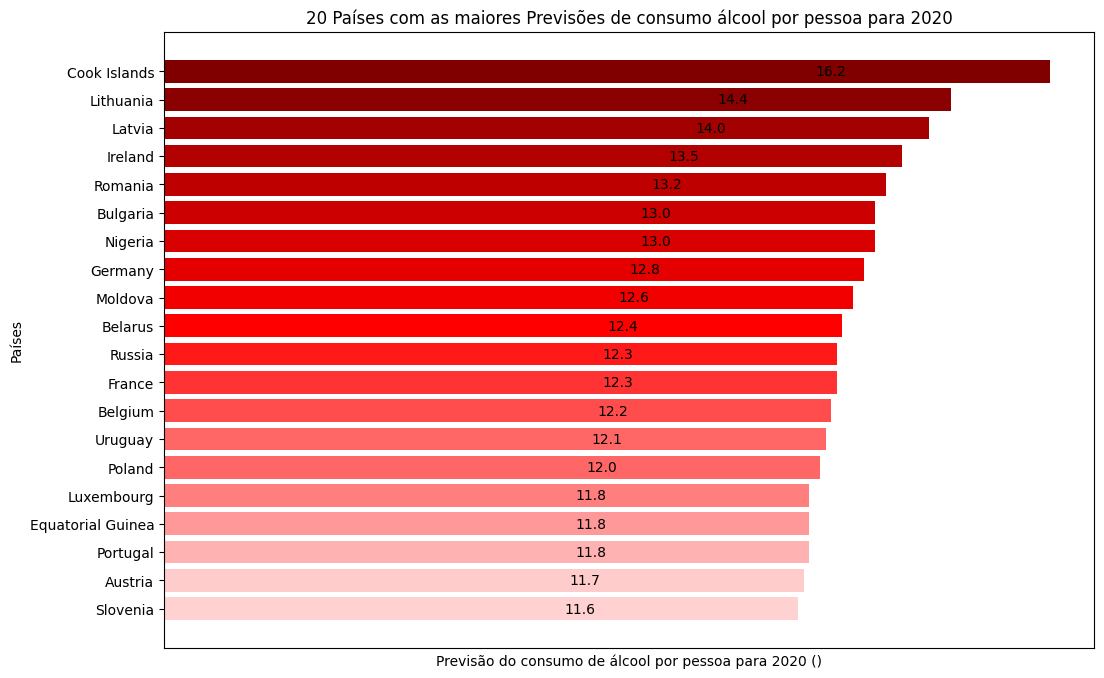

In [116]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(top_20_projection_2020['country'], top_20_projection_2020['2020_projection'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Previsão do consumo de álcool por pessoa para 2020 ()')
plt.ylabel('Países')
plt.title('20 Países com as maiores Previsões de consumo álcool por pessoa para 2020')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, top_20_projection_2020['2020_projection'], top_20_projection_2020['country']):
   plt.text(bar[0].get_width() - 4 , bar[0].get_y() + bar[0].get_height()/2, str(media), ha='center', va='center', color='black')


plt.xticks([])
plt.show()

In [121]:
df = df.sort_values(by=['2025_projection'], ascending=False)

In [122]:
top_20_projection_2025 = df.head(20)
top_20_projection_2025 = top_20_projection_2025[::-1]

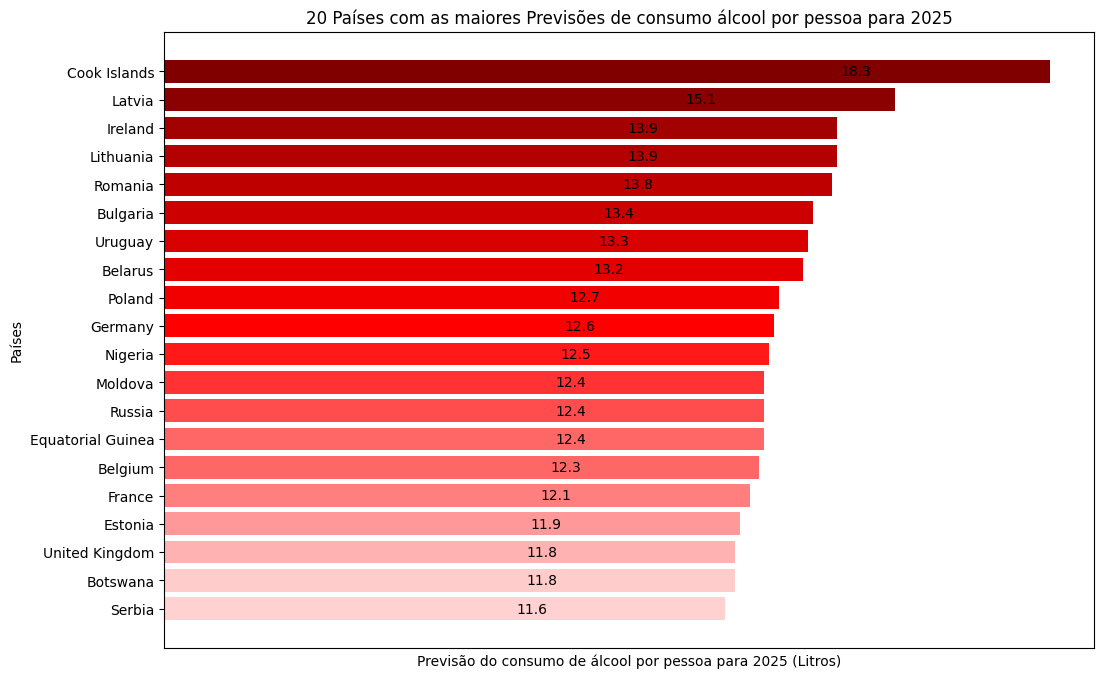

In [125]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(top_20_projection_2025['country'], top_20_projection_2025['2025_projection'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Previsão do consumo de álcool por pessoa para 2025 (Litros)')
plt.ylabel('Países')
plt.title('20 Países com as maiores Previsões de consumo álcool por pessoa para 2025')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, top_20_projection_2025['2025_projection'], top_20_projection_2025['country']):
   plt.text(bar[0].get_width() - 4 , bar[0].get_y() + bar[0].get_height()/2, str(media), ha='center', va='center', color='black')


plt.xticks([])
plt.show()

# Base Importação de vinho EMBRAPA

In [301]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Repository\Study\Data_Science_Projects\Studies\Datasets\ImpVinhos.csv' , sep=';')

In [302]:
df.shape

(66, 108)

In [303]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.0,0.0
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574.0,87519642.0


In [304]:
def rename_columns(col):
    if col.endswith('.1') and col != 'País':
        return col[:-2] + '_valor'
    elif col != 'País':
        return col + '_quantidade'
    else:
        return col

df.columns = df.columns.to_series().apply(rename_columns)

In [305]:
# excluir colunas que começam com '19'
df = df.drop(columns=[col for col in df.columns if col.startswith('19')])

In [306]:
df = df.drop('Id_quantidade', axis=1)

In [307]:
# supondo que 'df' seja o nome do seu DataFrame
df = df.drop([col for col in df.columns if col.startswith(('2000', '2001', '2002', '2003', '2004', '2005', '2006'))], axis=1)

In [308]:
df_quantidade = df.filter(regex='_quantidade$')

In [309]:
df_quantidade['País'] = df['País']

In [310]:
df_quantidade = df_quantidade.set_index('País')

In [311]:
df_quantidade['media_quantidade'] = df_quantidade.mean(axis=1)

In [312]:
df_quantidade['media_quantidade'] = df_quantidade['media_quantidade'].astype(int)

In [313]:
df_quantidade = df_quantidade.sort_values(by=['media_quantidade'], ascending=False)

In [314]:
df_quantidade_top_20 = df_quantidade.head(20)

In [315]:
df_quantidade_top_20 = df_quantidade_top_20[::-1]

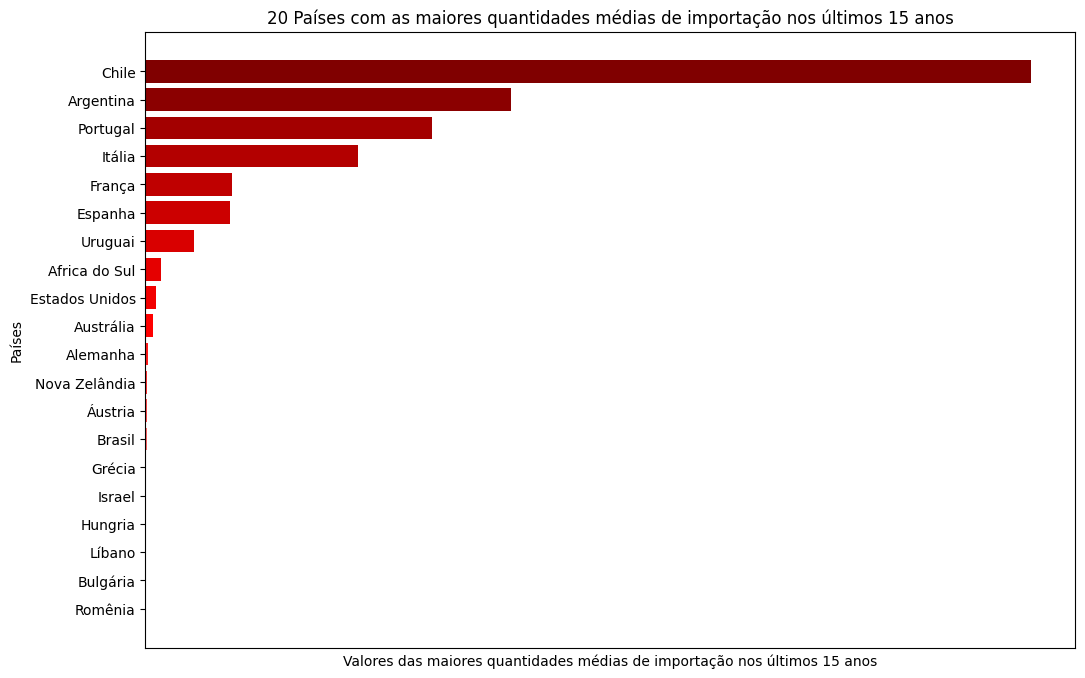

In [316]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_quantidade_top_20.index, df_quantidade_top_20['media_quantidade'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Valores das maiores quantidades médias de importação nos últimos 15 anos')
plt.ylabel('Países')
plt.title('20 Países com as maiores quantidades médias de importação nos últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

In [317]:
df_valor = df.filter(regex='_valor$')

In [318]:

df_valor['País'] = df['País']

In [319]:
df_valor = df_valor.set_index('País')

In [320]:
df_valor['media_valor'] = df_valor.mean(axis=1)

In [321]:
df_valor['media_valor'] = df_valor['media_valor'].astype(int)

In [322]:
df_valor = df_valor.sort_values(by=['media_valor'], ascending=False)

In [323]:
df_valor_top_20 = df_valor.head(20)

In [324]:
df_valor_top_20 = df_valor_top_20[::-1]

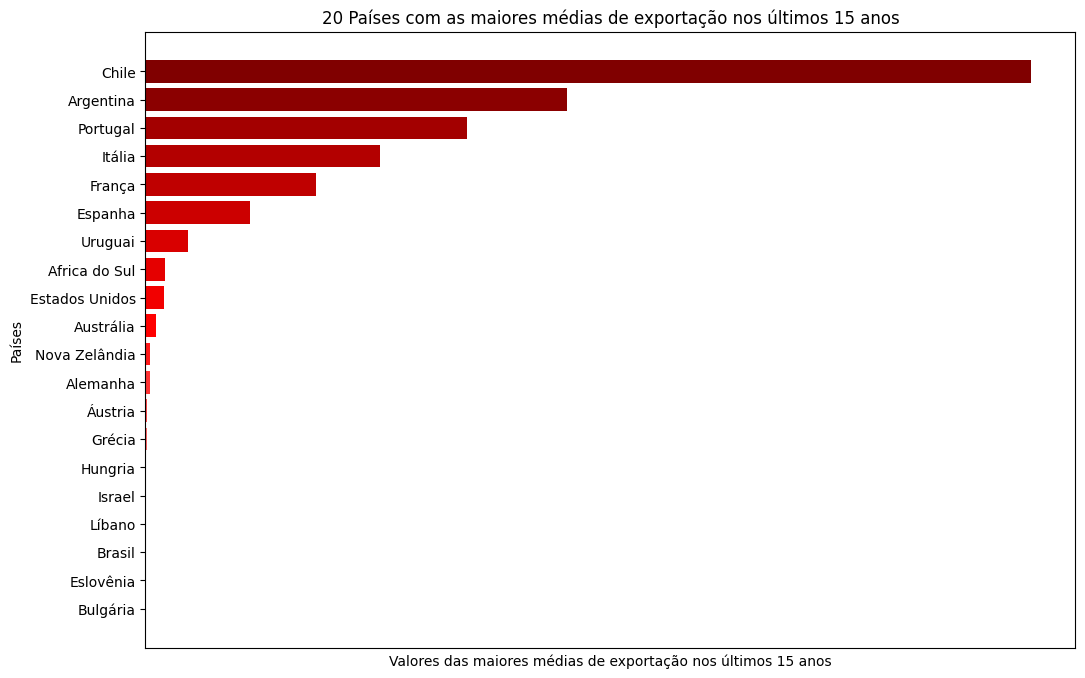

In [325]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_valor_top_20.index, df_valor_top_20['media_valor'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Valores das maiores médias de exportação nos últimos 15 anos')
plt.ylabel('Países')
plt.title('20 Países com as maiores médias de exportação nos últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

plt.xticks([])
plt.show()

# Base Exportação de vinho EMBRAPA

In [239]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Repository\Study\Data_Science_Projects\Studies\Datasets\ExpVinho.csv' , sep=';')

In [240]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
def rename_columns(col):
    if col.endswith('.1') and col != 'País':
        return col[:-2] + '_valor'
    elif col != 'País':
        return col + '_quantidade'
    else:
        return col

df.columns = df.columns.to_series().apply(rename_columns)

In [242]:
# excluir colunas que começam com '19'
df = df.drop(columns=[col for col in df.columns if col.startswith('19')])

In [243]:
df = df.drop('Id_quantidade', axis=1)

In [244]:
# supondo que 'df' seja o nome do seu DataFrame
df = df.drop([col for col in df.columns if col.startswith(('2000', '2001', '2002', '2003', '2004', '2005', '2006'))], axis=1)

In [245]:
df_quantidade = df.filter(regex='_quantidade$')

In [246]:
df_quantidade['País'] = df['País']

In [247]:
df_quantidade = df_quantidade.set_index('País')

In [248]:
df_quantidade['media_quantidade'] = df_quantidade.mean(axis=1)

In [249]:
df_quantidade['media_quantidade'] = df_quantidade['media_quantidade'].astype(int)

In [250]:
df_quantidade = df_quantidade.sort_values(by=['media_quantidade'], ascending=False)

In [251]:
df_quantidade_top_20 = df_quantidade.head(20)

In [252]:
df_quantidade_top_20.head()

,2007_quantidade,2008_quantidade,2009_quantidade,2010_quantidade,2011_quantidade,2012_quantidade,2013_quantidade,2014_quantidade,2015_quantidade,2016_quantidade,2017_quantidade,2018_quantidade,2019_quantidade,2020_quantidade,2021_quantidade,2022_quantidade,media_quantidade
País,,,,,,,,,,,,,,,,,
Rússia,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,2456012
Paraguai,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,1906264
Estados Unidos,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,252664
China,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,157318
Espanha,0,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,124562


In [253]:
df_quantidade_top_20 = df_quantidade_top_20[::-1]

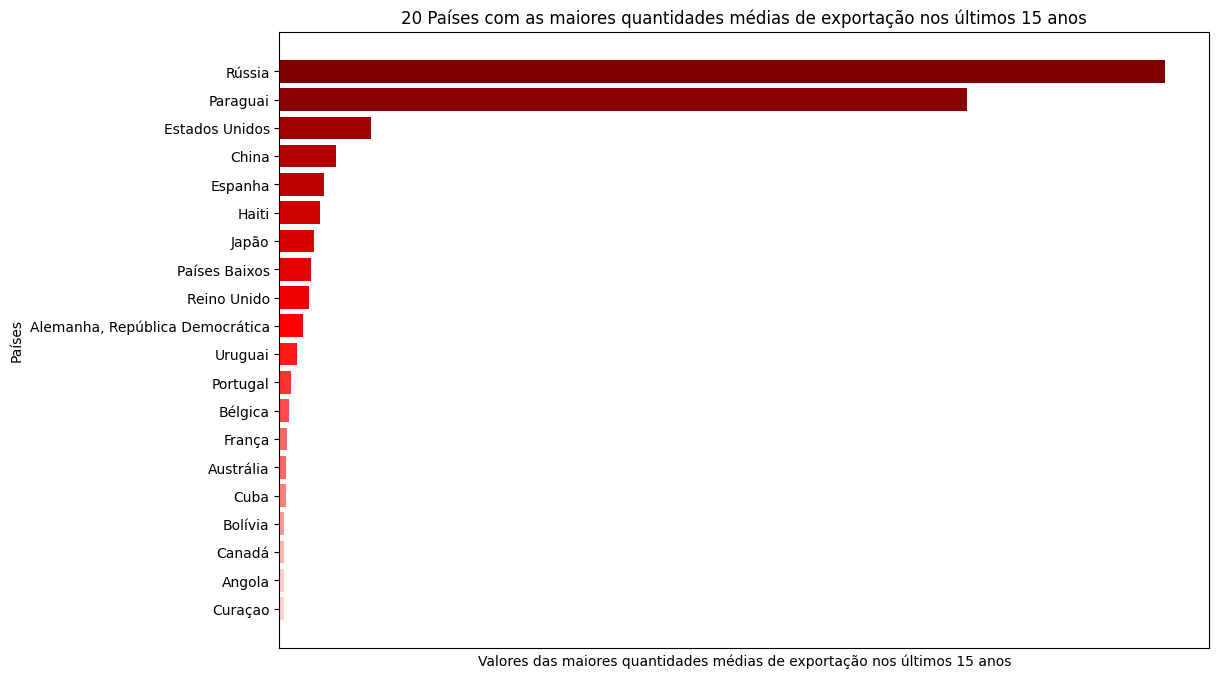

In [255]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_quantidade_top_20.index, df_quantidade_top_20['media_quantidade'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Valores das maiores quantidades médias de exportação nos últimos 15 anos')
plt.ylabel('Países')
plt.title('20 Países com as maiores quantidades médias de exportação nos últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

In [256]:
df_valor = df.filter(regex='_valor$')

In [257]:

df_valor['País'] = df['País']

In [258]:
df_valor = df_valor.set_index('País')

In [259]:
df_valor['media_valor'] = df_valor.mean(axis=1)

In [260]:
df_valor['media_valor'] = df_valor['media_valor'].astype(int)

In [261]:
df_valor = df_valor.sort_values(by=['media_valor'], ascending=False)

In [262]:
df_valor_top_20 = df_valor.head(20)

In [263]:
df_valor_top_20.head()

,2007_valor,2008_valor,2009_valor,2010_valor,2011_valor,2012_valor,2013_valor,2014_valor,2015_valor,2016_valor,2017_valor,2018_valor,2019_valor,2020_valor,2021_valor,2022_valor,media_valor
País,,,,,,,,,,,,,,,,,
Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,2470034
Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,1604852
Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,655912
Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,303481
China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,298557


In [264]:
df_valor_top_20 = df_valor_top_20[::-1]

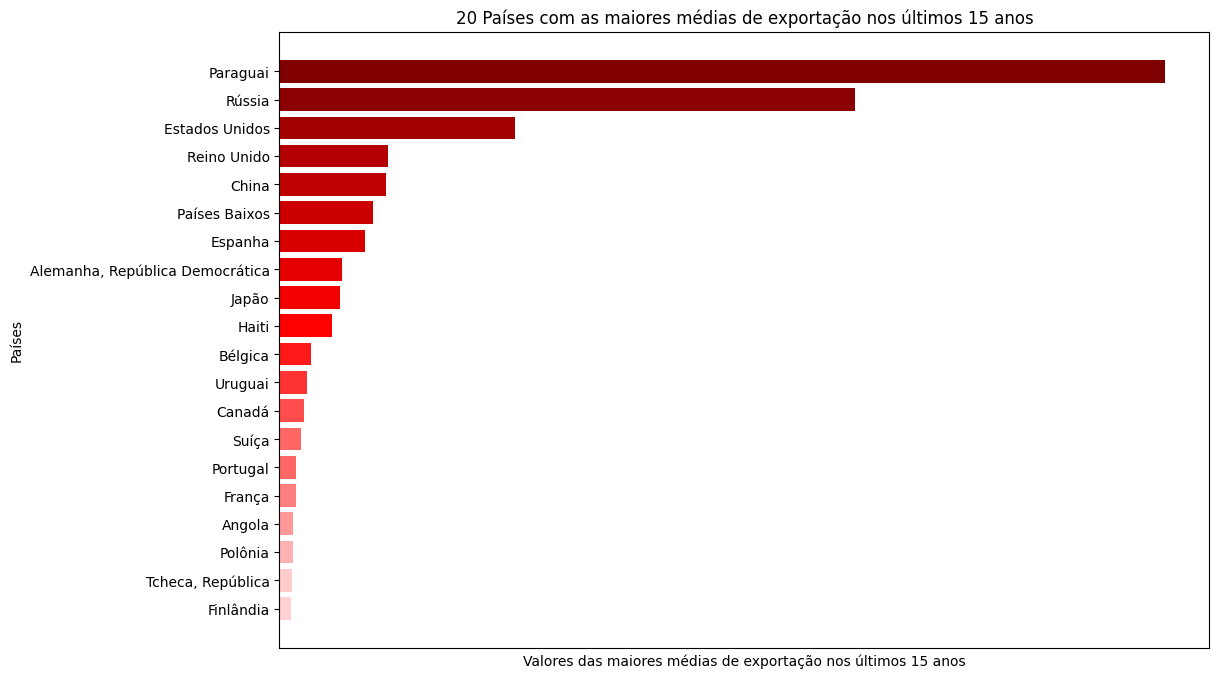

In [267]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_valor_top_20.index, df_valor_top_20['media_valor'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Valores das maiores médias de exportação nos últimos 15 anos')
plt.ylabel('Países')
plt.title('20 Países com as maiores médias de exportação nos últimos 15 anos')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

plt.xticks([])
plt.show()

# Análise no ano de 2016

In [326]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Repository\Study\Data_Science_Projects\Studies\Datasets\ExpVinho.csv' , sep=';')

In [327]:
df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
def rename_columns(col):
    if col.endswith('.1') and col != 'País':
        return col[:-2] + '_valor'
    elif col != 'País':
        return col + '_quantidade'
    else:
        return col

df.columns = df.columns.to_series().apply(rename_columns)

In [329]:
df.head()

,Id_quantidade,País,1970_quantidade,1970_valor,1971_quantidade,1971_valor,1972_quantidade,1972_valor,1973_quantidade,1973_valor,...,2018_quantidade,2018_valor,2019_quantidade,2019_valor,2020_quantidade,2020_valor,2021_quantidade,2021_valor,2022_quantidade,2022_valor
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
df = df[['País' , '2016_quantidade' , '2016_valor']]

In [333]:
df

,País,2016_quantidade,2016_valor
0,Afeganistão,0,0
1,África do Sul,0,0
2,"Alemanha, República Democrática",14012,68109
3,Angola,7359,35390
4,Anguilla,0,0
...,...,...,...
123,Tuvalu,0,0
124,Uruguai,0,0
125,Vanuatu,0,0
126,Venezuela,0,0


In [334]:
df['2016_quantidade'] = df['2016_quantidade'].astype(int)

In [335]:
df['2016_valor'] = df['2016_valor'].astype(int)

In [336]:
df_valor = df.sort_values(by=['2016_valor'], ascending=False)

In [337]:
df_quantidade = df.sort_values(by=['2016_quantidade'], ascending=False)

In [339]:
df_valor_top_20 = df_valor.head(20)

In [340]:
df_quantidade_top_20 = df_quantidade.head(20)

In [343]:
df_quantidade_top_20 = df_quantidade_top_20[::-1]

In [345]:
df_valor_top_20 = df_valor_top_20[::-1]

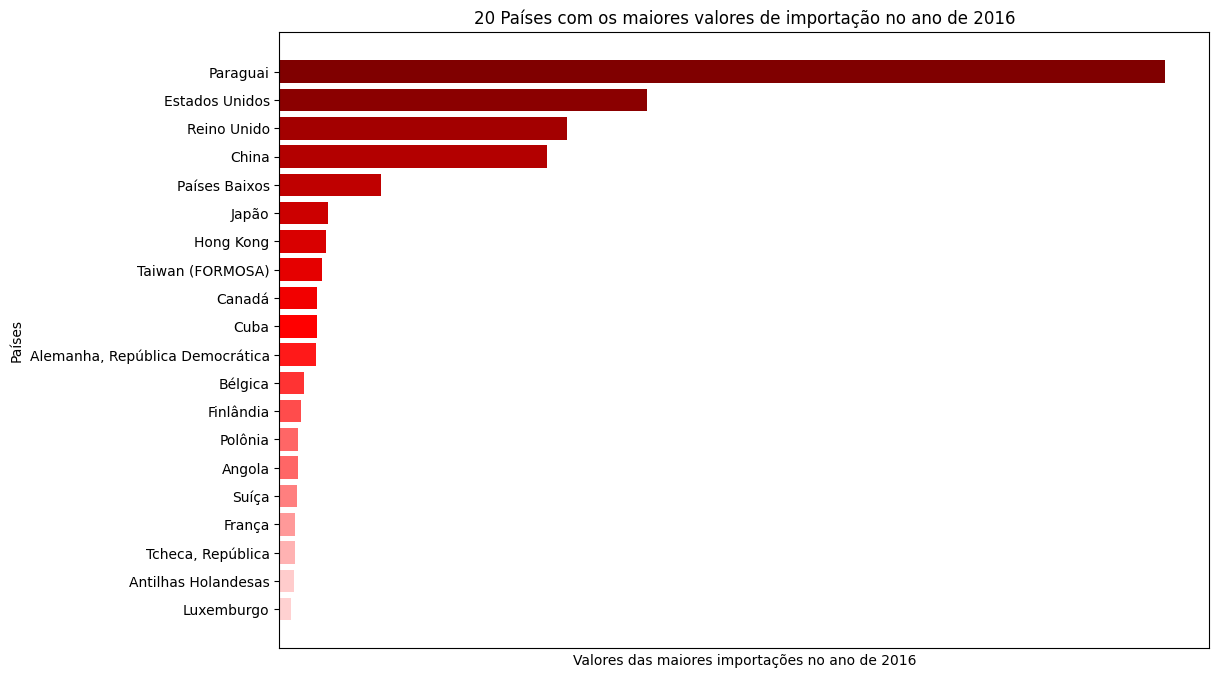

In [347]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_valor_top_20['País'], df_valor_top_20['2016_valor'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Valores das maiores importações no ano de 2016')
plt.ylabel('Países')
plt.title('20 Países com os maiores valores de importação no ano de 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

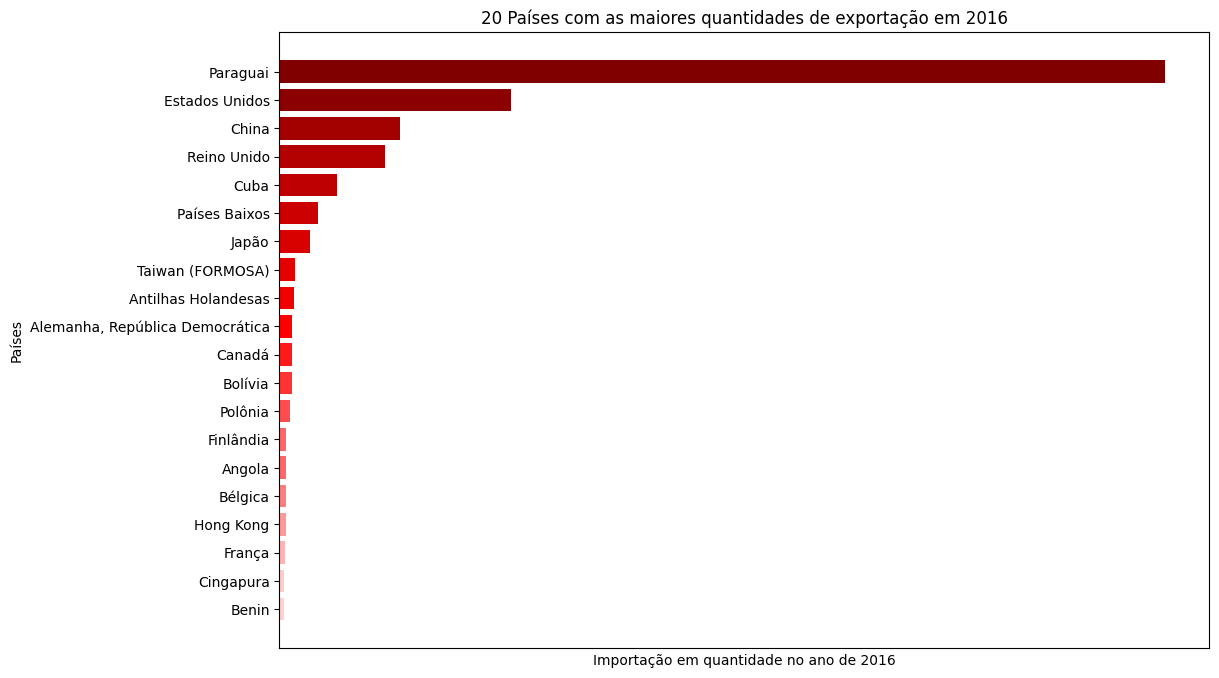

In [354]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_quantidade_top_20['País'], df_quantidade_top_20['2016_quantidade'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Importação em quantidade no ano de 2016')
plt.ylabel('Países')
plt.title('20 Países com as maiores quantidades de exportação em 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade


plt.xticks([])
plt.show()

In [348]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Repository\Study\Data_Science_Projects\Studies\Datasets\alcohol-consumption.csv')

In [349]:
df = df.drop(['beer_percentage' , 'spirits_percentage' , 'other_percentage'] , axis=1)

In [350]:
df = df.sort_values(by=['wine_percentage'], ascending=False)

In [351]:
df_top_20 = df.head(20)

In [352]:
df_top_20 = df_top_20[::-1]

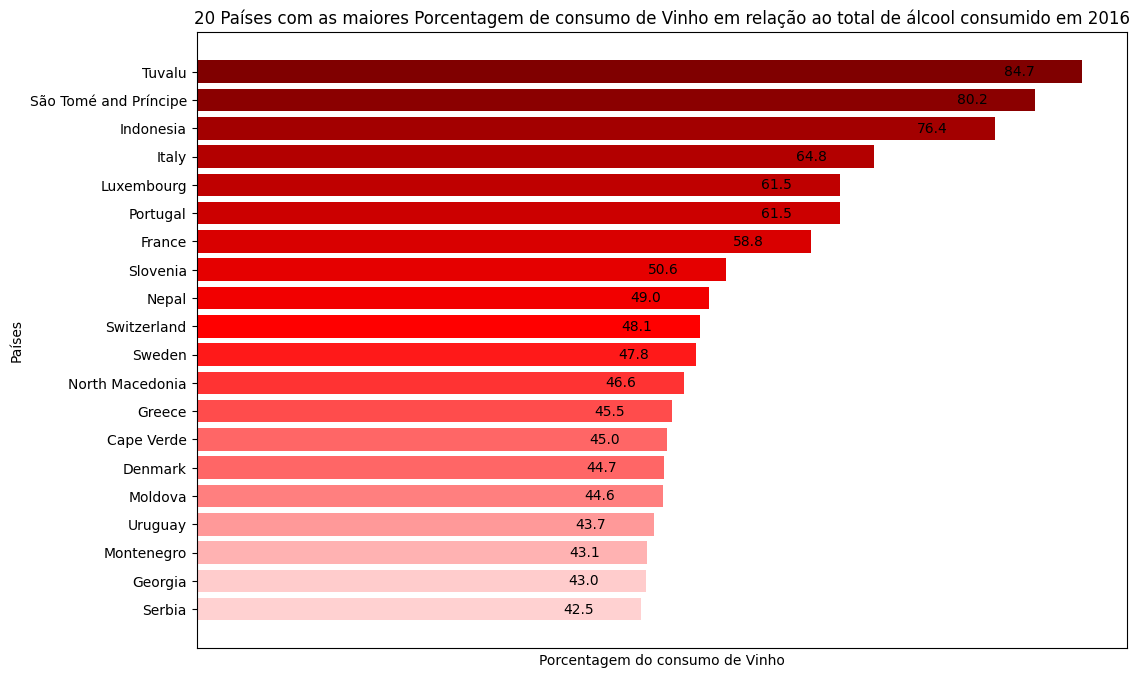

In [353]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_top_20['country'], df_top_20['wine_percentage'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Porcentagem do consumo de Vinho')
plt.ylabel('Países')
plt.title('20 Países com as maiores Porcentagem de consumo de Vinho em relação ao total de álcool consumido em 2016')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, df_top_20['wine_percentage'], df_top_20['country']):
   plt.text(bar[0].get_width() - 6 , bar[0].get_y() + bar[0].get_height()/2, str(media), ha='center', va='center', color='black')


plt.xticks([])
plt.show()

# Análise de avaliações de vinhos no mundo 

In [385]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Repository\Study\Data_Science_Projects\Studies\Datasets\Winery.csv')

In [386]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [387]:
df_pais_unico = df.groupby('country')['points'].max().reset_index()

In [388]:
df_pais_unico.head()

,country,points
0,Argentina,97
1,Armenia,88
2,Australia,100
3,Austria,98
4,Bosnia and Herzegovina,88


In [389]:
df_pais_unico = df_pais_unico.sort_values(by=['points'], ascending=False)

In [390]:
df_top_20 = df_pais_unico.head(20)

In [391]:
df_top_20

,country,points
2,Australia,100
40,US,100
31,Portugal,100
22,Italy,100
15,France,100
3,Austria,98
37,Spain,98
17,Germany,98
0,Argentina,97
19,Hungary,97


In [393]:
df_top_20 = df_top_20[::-1]

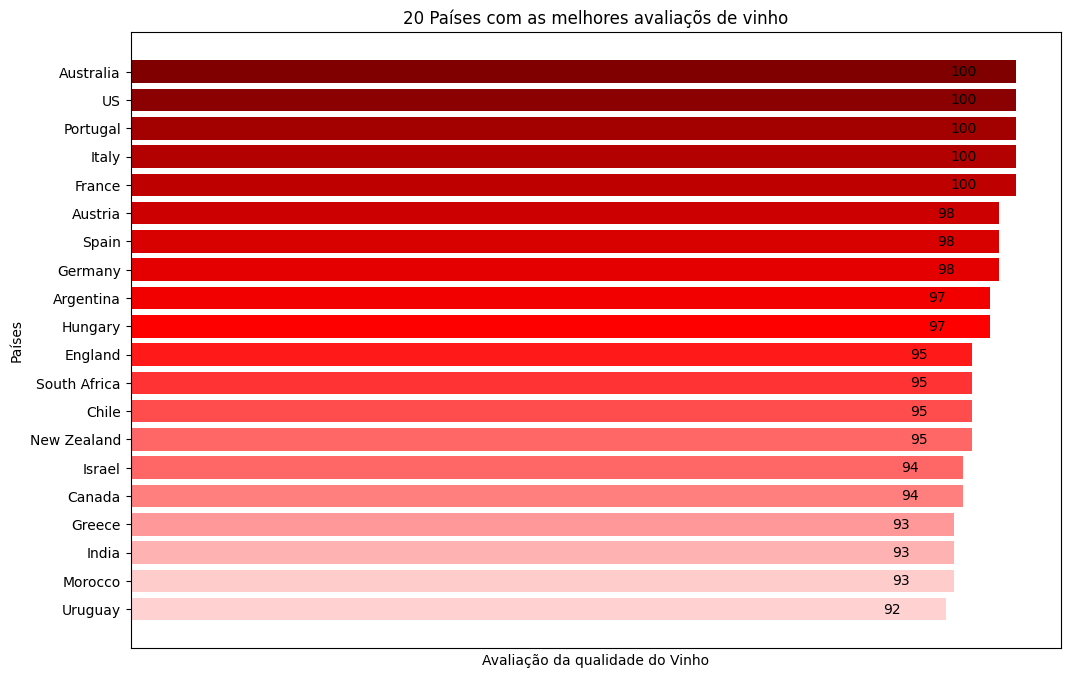

In [395]:
plt.figure(figsize=(12, 8))
bars = []
for i, (pais, media, cor) in enumerate(zip(df_top_20['country'], df_top_20['points'], cores)):
    bar = plt.barh(pais, media, color=cor)
    bars.append(bar)          
plt.xlabel('Avaliação da qualidade do Vinho')
plt.ylabel('Países')
plt.title('20 Países com as melhores avaliaçõs de vinho')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade

for bar, media, pais in zip(bars, df_top_20['points'], df_top_20['country']):
   plt.text(bar[0].get_width() - 6 , bar[0].get_y() + bar[0].get_height()/2, str(media), ha='center', va='center', color='black')


plt.xticks([])
plt.show()